In [38]:
import numpy as np
def loadSimpData():
    data=np.matrix([[1.,2.1],
                [2.,1.1],
                [1.3,1.],
                [1.,1.],
                [2.,1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return data,classLabels

In [39]:
datMat,classLabels=loadSimpData()

### 单层决策树的生成函数

In [40]:
#该函数的作用是对dataMatrix中第dimen维（第dimen个特征）进行划分，阈值为threshVal，threshIeq表示划分后的分类
#此处针对的是二分类问题，并且采用的基分类器是决策树桩
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    retArray=np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq=='lt':
        retArray[dataMatrix[:,dimen]<=threshVal]=-1.0
    else:
        retArray[dataMatrix[:,dimen]>threshVal]=-1.0
    return retArray

#该函数的作用是对每一个特征都依次去找不同的阈值划分，直到找到错误率最低的划分即可作为划分,D表示权值
def buildStump(dataArr,classLabels,D):
    dataMatrix=np.mat(dataArr)
    labelMatrix=np.mat(classLabels).T
    m,n=np.shape(dataMatrix)
    numSteps=10.0
    bestStump={}
    bestClassEst=np.mat(np.zeros((m,1)))
    minError=np.inf
    for i in range(n):
        rangeMin=dataMatrix[:,i].min()
        rangeMax=dataMatrix[:,i].max()
        stepSize=(rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal=rangeMin+j*stepSize
                predictedVals=stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr=np.mat(np.ones((m,1)))
                errArr[predictedVals==labelMatrix]=0
                weightedError=D.T*errArr
                print("split: dim %d,thresh %.2f,thresh inequal: %s, the weighted error is %.3f"%(i,threshVal,inequal,weightedError))
                if weightedError<minError:
                    minError=weightedError
                    bestClassEst=predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh']=threshVal
                    bestStump['ineq']=inequal
    return bestStump,minError,bestClassEst

In [41]:
D=np.mat(np.ones((5,1))/5)

In [42]:
buildStump(datMat,classLabels,D)

split: dim 0,thresh 0.90,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 0.90,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.00,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.00,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.10,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.10,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.20,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.20,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.30,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.30,thresh inequal: gt, the weighted error is 0.800
split: dim 0,thresh 1.40,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.40,thresh inequal: gt, the weighted error is 0.800
split: dim 0,thresh 1.50,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.50,thresh inequal: gt, the we

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

### 完整的AdaBoost算法
    算法的伪代码如下：
        1.利用buildStump()函数找到最佳的单层决策树
        2.将最佳单层决策树加入到单层决策树数组
        3.计算alpha
        4.计算新的权重向量
        5.更新累计类别估计值
        6.如果错误率等于0.0，则退出循环

In [132]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr=[]        
    m=np.mat(dataArr).shape[0]
    D=np.mat(np.ones((m,1))/m)              #各个变量的权值，初始化为相同的值
    aggClassEst=np.mat(np.zeros((m,1))/m)     #累计的预测值，使用sign函数得到最终的预测结果
    for i in range(numIt):
        Stump,minError,ClassEst=buildStump(dataArr,classLabels,D)
        print("D:",D.T)
        alpha=float(0.5*np.log((1.0-minError)/max(1e-16,minError)))   #防止由于错误率太低而造成alpha溢出
        Stump['alpha']=alpha
        weakClassArr.append(Stump)
        print("classEst:",ClassEst.T)
        expon=np.multiply(-1*alpha*np.mat(classLabels).T,ClassEst)
        D=np.multiply(D,np.exp(expon))
        D=D/D.sum()
        aggClassEst+=alpha*ClassEst
        aggErrors=np.multiply(np.sign(aggClassEst)!=np.mat(classLabels).T,np.ones((m,1)))
        errorRate=aggErrors.sum()/m
        print("total error: ",errorRate,"\n")
        if errorRate==0.0:
            break
    return weakClassArr,aggClassEst

In [59]:
datMat

matrix([[1. , 2.1],
        [2. , 1.1],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

In [60]:
classfierArr=adaBoostTrainDS(datMat,classLabels,9)

split: dim 0,thresh 0.90,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 0.90,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.00,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.00,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.10,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.10,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.20,thresh inequal: lt, the weighted error is 0.400
split: dim 0,thresh 1.20,thresh inequal: gt, the weighted error is 0.600
split: dim 0,thresh 1.30,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.30,thresh inequal: gt, the weighted error is 0.800
split: dim 0,thresh 1.40,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.40,thresh inequal: gt, the weighted error is 0.800
split: dim 0,thresh 1.50,thresh inequal: lt, the weighted error is 0.200
split: dim 0,thresh 1.50,thresh inequal: gt, the we

### 测试算法：基于AdaBoost的分类

In [94]:
def adaClassify(dataToClass,classfierArr):
    dataMatrix=np.mat(dataToClass)
    m=dataMatrix.shape[0]
    aggClassEst=np.mat(np.zeros((m,1)))
    for i in range(len(classfierArr)):
        classEst=stumpClassify(dataMatrix,classfierArr[i]['dim'],classfierArr[i]['thresh'],classfierArr[i]['ineq'])
        aggClassEst+=classfierArr[i]['alpha']*classEst
        #print(aggClassEst)
    return np.sign(aggClassEst)

In [76]:
adaClassify([[5,5],[0,0]],classfierArr)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.66610226]
 [-1.66610226]]
[[ 2.56198199]
 [-2.56198199]]


matrix([[ 1.],
        [-1.]])

### 数据集上测试adaboost算法

In [77]:
#函数会根据文件名返回特征矩阵和标签矩阵
def loadData(filename):
    lines=open(filename).readlines()
    dataMat=[]
    classLabels=[]
    for line in lines:
        lineArr=[]
        strings=line.strip().split('\t')
        numFeatures=len(strings)-1
        for i in range(numFeatures):
            lineArr.append(float(strings[i]))
        dataMat.append(lineArr)
        classLabels.append(float(strings[-1]))
    return dataMat,classLabels

In [80]:
traindataArr,trainlabelArr=loadData('./Dataset/horseColic/horseColicTraining2.txt')

In [81]:
classfierArr=adaBoostTrainDS(traindataArr,trainlabelArr,10)

split: dim 0,thresh 0.90,thresh inequal: lt, the weighted error is 0.405
split: dim 0,thresh 0.90,thresh inequal: gt, the weighted error is 0.595
split: dim 0,thresh 1.00,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.00,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.10,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.10,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.20,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.20,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.30,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.30,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.40,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.40,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.50,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.50,thresh inequal: gt, the we

split: dim 10,thresh 0.40,thresh inequal: gt, the weighted error is 0.501
split: dim 10,thresh 0.80,thresh inequal: lt, the weighted error is 0.499
split: dim 10,thresh 0.80,thresh inequal: gt, the weighted error is 0.501
split: dim 10,thresh 1.20,thresh inequal: lt, the weighted error is 0.538
split: dim 10,thresh 1.20,thresh inequal: gt, the weighted error is 0.462
split: dim 10,thresh 1.60,thresh inequal: lt, the weighted error is 0.538
split: dim 10,thresh 1.60,thresh inequal: gt, the weighted error is 0.462
split: dim 10,thresh 2.00,thresh inequal: lt, the weighted error is 0.548
split: dim 10,thresh 2.00,thresh inequal: gt, the weighted error is 0.452
split: dim 10,thresh 2.40,thresh inequal: lt, the weighted error is 0.548
split: dim 10,thresh 2.40,thresh inequal: gt, the weighted error is 0.452
split: dim 10,thresh 2.80,thresh inequal: lt, the weighted error is 0.548
split: dim 10,thresh 2.80,thresh inequal: gt, the weighted error is 0.452
split: dim 10,thresh 3.20,thresh inequ

split: dim 13,thresh 1.20,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.20,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 1.50,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.50,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 1.80,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.80,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 2.10,thresh inequal: lt, the weighted error is 0.545
split: dim 13,thresh 2.10,thresh inequal: gt, the weighted error is 0.455
split: dim 13,thresh 2.40,thresh inequal: lt, the weighted error is 0.545
split: dim 13,thresh 2.40,thresh inequal: gt, the weighted error is 0.455
split: dim 13,thresh 2.70,thresh inequal: lt, the weighted error is 0.545
split: dim 13,thresh 2.70,thresh inequal: gt, the weighted error is 0.455
split: dim 13,thresh 3.00,thresh inequal: lt, the weighted error is 0.526
split: dim 13,thresh 3.00,thresh inequ

split: dim 13,thresh 0.30,thresh inequal: lt, the weighted error is 0.489
split: dim 13,thresh 0.30,thresh inequal: gt, the weighted error is 0.511
split: dim 13,thresh 0.60,thresh inequal: lt, the weighted error is 0.489
split: dim 13,thresh 0.60,thresh inequal: gt, the weighted error is 0.511
split: dim 13,thresh 0.90,thresh inequal: lt, the weighted error is 0.489
split: dim 13,thresh 0.90,thresh inequal: gt, the weighted error is 0.511
split: dim 13,thresh 1.20,thresh inequal: lt, the weighted error is 0.509
split: dim 13,thresh 1.20,thresh inequal: gt, the weighted error is 0.491
split: dim 13,thresh 1.50,thresh inequal: lt, the weighted error is 0.509
split: dim 13,thresh 1.50,thresh inequal: gt, the weighted error is 0.491
split: dim 13,thresh 1.80,thresh inequal: lt, the weighted error is 0.509
split: dim 13,thresh 1.80,thresh inequal: gt, the weighted error is 0.491
split: dim 13,thresh 2.10,thresh inequal: lt, the weighted error is 0.496
split: dim 13,thresh 2.10,thresh inequ

split: dim 5,thresh 0.80,thresh inequal: gt, the weighted error is 0.500
split: dim 5,thresh 1.20,thresh inequal: lt, the weighted error is 0.515
split: dim 5,thresh 1.20,thresh inequal: gt, the weighted error is 0.485
split: dim 5,thresh 1.60,thresh inequal: lt, the weighted error is 0.515
split: dim 5,thresh 1.60,thresh inequal: gt, the weighted error is 0.485
split: dim 5,thresh 2.00,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.00,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 2.40,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.40,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 2.80,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.80,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 3.20,thresh inequal: lt, the weighted error is 0.453
split: dim 5,thresh 3.20,thresh inequal: gt, the weighted error is 0.547
split: dim 5,thresh 3.60,thresh inequal: lt, the we

In [82]:
testdataArr,testlabelArr=loadData('./Dataset/horseColic/horseColicTest2.txt')

In [95]:
testEst=adaClassify(testdataArr,classfierArr)

In [101]:
testEst.T

matrix([[ 1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
          1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
          1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
          1.,  1.]])

In [100]:
np.mat(testlabelArr)

matrix([[ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
          1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
         -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
          1., -1.]])

In [108]:
ErrorTest=[testEst.T!=np.mat(testlabelArr)]i

In [111]:
ErrorTest[0].astype(int).sum()

16

### ROC曲线绘制以及AUC计算函数

In [146]:
def plotROC(predStrengths,classLabels):
    import matplotlib.pyplot as plt
    cur=(1.0,1.0)
    ySum=0.0
    numPosClass=sum(np.array(classLabels)==1.0)
    yStep=1/float(numPosClass)
    xStep=1/float(len(classLabels)-numPosClass)
    sortedIndices=predStrengths.T.argsort()
    fig=plt.figure()
    fig.clf()
    ax=plt.subplot(111)
    #print(predStrengths)
    for index in sortedIndices.tolist()[0]:
        if classLabels[index]==1.0:
            delx=0
            dely=yStep
        else:
            delx=xStep
            dely=0
            ySum+=cur[1]
        ax.plot([cur[0],cur[0]-delx],[cur[1],cur[1]-dely],c='r')
        cur=(cur[0]-delx,cur[1]-dely)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for AdaBoost Horse Colic Detection System')
    ax.axis([0,1,0,1])
    plt.show()
    print('The AUC is: ',ySum*xStep)

In [147]:
classfierArr,aggClassEst=adaBoostTrainDS(traindataArr,trainlabelArr,10)

split: dim 0,thresh 0.90,thresh inequal: lt, the weighted error is 0.405
split: dim 0,thresh 0.90,thresh inequal: gt, the weighted error is 0.595
split: dim 0,thresh 1.00,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.00,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.10,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.10,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.20,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.20,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.30,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.30,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.40,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.40,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.50,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.50,thresh inequal: gt, the we

split: dim 14,thresh 0.00,thresh inequal: lt, the weighted error is 0.493
split: dim 14,thresh 0.00,thresh inequal: gt, the weighted error is 0.507
split: dim 14,thresh 0.75,thresh inequal: lt, the weighted error is 0.493
split: dim 14,thresh 0.75,thresh inequal: gt, the weighted error is 0.507
split: dim 14,thresh 1.50,thresh inequal: lt, the weighted error is 0.484
split: dim 14,thresh 1.50,thresh inequal: gt, the weighted error is 0.516
split: dim 14,thresh 2.25,thresh inequal: lt, the weighted error is 0.477
split: dim 14,thresh 2.25,thresh inequal: gt, the weighted error is 0.523
split: dim 14,thresh 3.00,thresh inequal: lt, the weighted error is 0.482
split: dim 14,thresh 3.00,thresh inequal: gt, the weighted error is 0.518
split: dim 14,thresh 3.75,thresh inequal: lt, the weighted error is 0.474
split: dim 14,thresh 3.75,thresh inequal: gt, the weighted error is 0.526
split: dim 14,thresh 4.50,thresh inequal: lt, the weighted error is 0.452
split: dim 14,thresh 4.50,thresh inequ

split: dim 13,thresh 0.00,thresh inequal: gt, the weighted error is 0.526
split: dim 13,thresh 0.30,thresh inequal: lt, the weighted error is 0.474
split: dim 13,thresh 0.30,thresh inequal: gt, the weighted error is 0.526
split: dim 13,thresh 0.60,thresh inequal: lt, the weighted error is 0.474
split: dim 13,thresh 0.60,thresh inequal: gt, the weighted error is 0.526
split: dim 13,thresh 0.90,thresh inequal: lt, the weighted error is 0.474
split: dim 13,thresh 0.90,thresh inequal: gt, the weighted error is 0.526
split: dim 13,thresh 1.20,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.20,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 1.50,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.50,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 1.80,thresh inequal: lt, the weighted error is 0.547
split: dim 13,thresh 1.80,thresh inequal: gt, the weighted error is 0.453
split: dim 13,thresh 2.10,thresh inequ

split: dim 0,thresh 1.80,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 1.90,thresh inequal: lt, the weighted error is 0.438
split: dim 0,thresh 1.90,thresh inequal: gt, the weighted error is 0.562
split: dim 0,thresh 2.00,thresh inequal: lt, the weighted error is 0.471
split: dim 0,thresh 2.00,thresh inequal: gt, the weighted error is 0.529
split: dim 1,thresh 0.20,thresh inequal: lt, the weighted error is 0.529
split: dim 1,thresh 0.20,thresh inequal: gt, the weighted error is 0.471
split: dim 1,thresh 1.00,thresh inequal: lt, the weighted error is 0.489
split: dim 1,thresh 1.00,thresh inequal: gt, the weighted error is 0.511
split: dim 1,thresh 1.80,thresh inequal: lt, the weighted error is 0.489
split: dim 1,thresh 1.80,thresh inequal: gt, the weighted error is 0.511
split: dim 1,thresh 2.60,thresh inequal: lt, the weighted error is 0.489
split: dim 1,thresh 2.60,thresh inequal: gt, the weighted error is 0.511
split: dim 1,thresh 3.40,thresh inequal: lt, the we

split: dim 5,thresh 0.80,thresh inequal: gt, the weighted error is 0.500
split: dim 5,thresh 1.20,thresh inequal: lt, the weighted error is 0.515
split: dim 5,thresh 1.20,thresh inequal: gt, the weighted error is 0.485
split: dim 5,thresh 1.60,thresh inequal: lt, the weighted error is 0.515
split: dim 5,thresh 1.60,thresh inequal: gt, the weighted error is 0.485
split: dim 5,thresh 2.00,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.00,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 2.40,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.40,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 2.80,thresh inequal: lt, the weighted error is 0.527
split: dim 5,thresh 2.80,thresh inequal: gt, the weighted error is 0.473
split: dim 5,thresh 3.20,thresh inequal: lt, the weighted error is 0.453
split: dim 5,thresh 3.20,thresh inequal: gt, the weighted error is 0.547
split: dim 5,thresh 3.60,thresh inequal: lt, the we

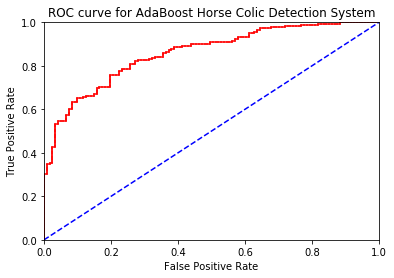

The AUC is:  0.8582969635063604


In [148]:
plotROC(aggClassEst,trainlabelArr)

In [142]:
aggClassEst.T.argsort()

matrix([[ 45,  59, 244, 230, 141,  40, 272,  35, 181,  83, 239, 192,  49,
         133,  46, 176, 121, 285,  30, 296, 227,  16, 150, 252, 101, 108,
          44, 173,  80,  58,  37,   4, 256, 225, 280, 172, 170, 270, 204,
         178, 295, 246,   0, 216, 168, 162, 291,  43, 253,  97,  99,  19,
         249, 184,   8,  86, 271, 245,  34, 179, 134,  15, 219, 229, 126,
          62, 159, 281, 221, 110, 274,  73, 234,  36, 262, 123, 200, 147,
         177,  63, 140,  48, 290, 196, 135,  78, 203, 238,  93, 210,  42,
          31,  75,  57, 247,  20, 254, 190, 113, 261,  72, 282, 195,  79,
           9, 171, 294, 128, 209, 151, 164,  66,  70,  68,  54, 258,  91,
         251,  64, 109,  82, 198,   3,  39,  25, 286,  41, 297,  55, 292,
         237,  10, 167, 104,  18, 193, 265, 207, 143, 273, 114,  90, 205,
         118, 102, 127, 259, 106,  26, 232, 131,   1, 117, 250, 266, 241,
         180, 174, 231, 287, 226, 206, 215, 298,  87,  74,  56, 160,  53,
         130,  28,  17, 188, 161,   7,